In [1]:
import requests
from bs4 import BeautifulSoup
import re

In [2]:
url='https://news.naver.com/main/ranking/popularDay.nhn?mid=etc&sid1=111'

In [3]:
page=requests.get(url)

In [4]:
page_soup=BeautifulSoup(page.text,'html.parser')

In [5]:
page_soup


<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh">
<meta content="width=1106" name="viewport">
<meta content="telephone=no" name="format-detection">
<meta content="많이 본 뉴스 : 네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="http://news.naver.com/main/ranking/popularDay.nhn?mid=etc&amp;sid1=111" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" property="og:image">
<meta content="기사의 조회 수를 각 섹션 기준으로 집계하여 제공" property="og:description"/>
<meta content="네이버" property="og:article:author">
<meta content="summary" name="twitter:card"/>
<meta content="많이 본 뉴스 : 네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ssl.pstatic.net/static.news/i

In [6]:
atags=page_soup.find_all('a',{'class':'nclicks(rank.tabsec2)'})

In [7]:
the_codes={}

In [8]:
for atag in atags:
    try:
        the_codes[re.search('ionId=([0-9]{3})',atag['href'])[1]]=[atag.get_text()[:-3]]
    except:
        print(atag)

<a class="nclicks(rank.tabsec2)" href="/main/ranking/popularDay.nhn?rankingType=popular_day&amp;date=20200624">종합<span class="blind">선택됨</span></a>


In [9]:
the_codes

{'100': ['정치'],
 '101': ['경제'],
 '102': ['사회'],
 '103': ['생활/문화'],
 '104': ['세계'],
 '105': ['IT/과학'],
 '003': ['포토'],
 '115': ['TV']}

In [10]:
for code in the_codes:
    params = {'rankingType': 'popular_day',
    'sectionId': code,
    'date': '20200622'}
    sub_page=requests.get('https://news.naver.com/main/ranking/popularDay.nhn',params=params)
    sub_soup=BeautifulSoup(sub_page.content,"html.parser")
    view_counts=sub_soup.find_all('div',{'class':'ranking_view'})
    if len(view_counts)==0:
        view_counts=sub_soup.find_all('div',{'class':'count_view'})
    cosum=0
    for view_count in view_counts:
        cosum+=int(view_count.get_text().replace(',',''))
    the_codes[code].append(cosum)

In [11]:
the_codes

{'100': ['정치', 3029773],
 '101': ['경제', 3444332],
 '102': ['사회', 4808709],
 '103': ['생활/문화', 3132130],
 '104': ['세계', 3011036],
 '105': ['IT/과학', 1018265],
 '003': ['포토', 6488874],
 '115': ['TV', 2582596]}

In [12]:
import pandas as pd

In [13]:
df=pd.DataFrame(the_codes)

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [15]:
df.columns=df.iloc[0,:]

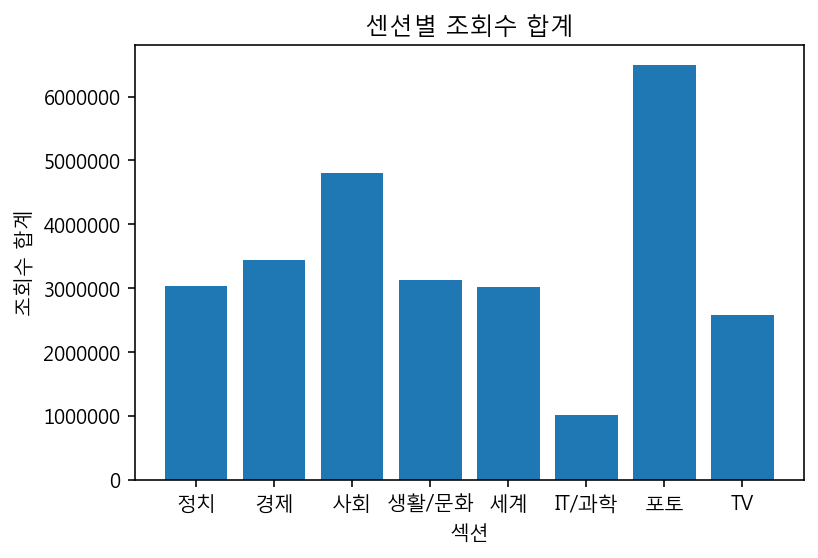

In [16]:
plt.bar(df.columns,df.iloc[1,:])
plt.title("센션별 조회수 합계")
plt.xlabel("섹션")
plt.ylabel("조회수 합계")
plt.savefig("sections_counts")

In [17]:
the_codes2={}

In [18]:
for atag in atags:
    try:
        the_codes2[re.search('ionId=([0-9]{3})',atag['href'])[1]]=[atag.get_text()[:-3]]
    except:
        print(atag)

<a class="nclicks(rank.tabsec2)" href="/main/ranking/popularDay.nhn?rankingType=popular_day&amp;date=20200624">종합<span class="blind">선택됨</span></a>


In [19]:
the_codes2

{'100': ['정치'],
 '101': ['경제'],
 '102': ['사회'],
 '103': ['생활/문화'],
 '104': ['세계'],
 '105': ['IT/과학'],
 '003': ['포토'],
 '115': ['TV']}

In [20]:
for code in the_codes2:
    params = {'rankingType': 'popular_day',
    'sectionId': code,
    'date': '20200622'}
    sub_page=requests.get('https://news.naver.com/main/ranking/popularDay.nhn',params=params)
    sub_soup=BeautifulSoup(sub_page.content,"html.parser")
    offices=sub_soup.find_all('div',{'class':'ranking_office'})
    if len(view_counts)==0:
        continue
    pool=[]
    for office in offices:
        pool.append(office.get_text())
    the_codes2[code].append(pool)

In [21]:
the_codes2

{'100': ['정치',
  ['서울신문',
   '조선일보',
   '조선일보',
   '한국경제',
   '아시아경제',
   '뉴시스',
   '서울신문',
   '조선일보',
   '헤럴드경제',
   '경향신문',
   '한국일보',
   '조선일보',
   '조선일보',
   '아시아경제',
   '연합뉴스',
   '조선일보',
   '미디어오늘',
   '중앙일보',
   '아시아경제',
   '국민일보',
   '세계일보',
   '헤럴드경제',
   '중앙일보',
   '중앙일보',
   '서울경제',
   '조선일보',
   '조선일보',
   '동아일보',
   '서울경제',
   '중앙일보']],
 '101': ['경제',
  ['중앙일보',
   '한국경제',
   '국민일보',
   '매일경제',
   '중앙일보',
   '중앙일보',
   '머니투데이',
   '한국경제',
   '연합뉴스',
   '매일경제',
   '한국경제',
   'SBS',
   '한국경제',
   '중앙일보',
   '한국경제',
   '매일경제',
   '머니투데이',
   '한국경제',
   '중앙일보',
   'SBS',
   'SBS',
   '서울신문',
   '연합뉴스',
   '중앙일보',
   '아시아경제',
   '파이낸셜뉴스',
   '서울신문',
   '세계일보',
   '조선일보',
   '서울신문']],
 '102': ['사회',
  ['연합뉴스',
   '연합뉴스',
   '중앙일보',
   '조선일보',
   'JTBC',
   '중앙일보',
   '중앙일보',
   '중앙일보',
   'SBS',
   'SBS',
   '중앙일보',
   '헤럴드경제',
   '중앙일보',
   '중앙일보',
   '조선일보',
   '머니투데이',
   '여성신문',
   '매일경제',
   '연합뉴스',
   '한국경제TV',
   '동아일보',
   '중앙일보',
   '뉴시스',
   '뉴스1',
   '아시아경제',
   '중앙일보

In [22]:
import collections

In [23]:
countlist={}

In [24]:
for x in the_codes2:
    countlist[x]=collections.Counter(the_codes2[x][1])

In [25]:
countlist

{'100': Counter({'서울신문': 2,
          '조선일보': 8,
          '한국경제': 1,
          '아시아경제': 3,
          '뉴시스': 1,
          '헤럴드경제': 2,
          '경향신문': 1,
          '한국일보': 1,
          '연합뉴스': 1,
          '미디어오늘': 1,
          '중앙일보': 4,
          '국민일보': 1,
          '세계일보': 1,
          '서울경제': 2,
          '동아일보': 1}),
 '101': Counter({'중앙일보': 6,
          '한국경제': 6,
          '국민일보': 1,
          '매일경제': 3,
          '머니투데이': 2,
          '연합뉴스': 2,
          'SBS': 3,
          '서울신문': 3,
          '아시아경제': 1,
          '파이낸셜뉴스': 1,
          '세계일보': 1,
          '조선일보': 1}),
 '102': Counter({'연합뉴스': 4,
          '중앙일보': 10,
          '조선일보': 2,
          'JTBC': 2,
          'SBS': 2,
          '헤럴드경제': 1,
          '머니투데이': 1,
          '여성신문': 1,
          '매일경제': 1,
          '한국경제TV': 1,
          '동아일보': 1,
          '뉴시스': 1,
          '뉴스1': 2,
          '아시아경제': 1}),
 '103': Counter({'조선일보': 3,
          '이데일리': 1,
          '중앙일보': 7,
          '서울신문': 2,
          '한국

In [26]:
df_of=pd.DataFrame(countlist)

In [27]:
df_of

,100,101,102,103,104,105,003,115
서울신문,2.0,3.0,NaN,2.0,3.0,1.0,NaN,NaN
조선일보,8.0,1.0,2.0,3.0,3.0,2.0,NaN,NaN
한국경제,1.0,6.0,NaN,3.0,NaN,2.0,NaN,NaN
아시아경제,3.0,1.0,1.0,NaN,NaN,2.0,NaN,NaN
뉴시스,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
헤럴드경제,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
경향신문,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
한국일보,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
연합뉴스,1.0,2.0,4.0,1.0,1.0,3.0,NaN,NaN
미디어오늘,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_of.drop(axis=1,columns=['003','115'],inplace=True)

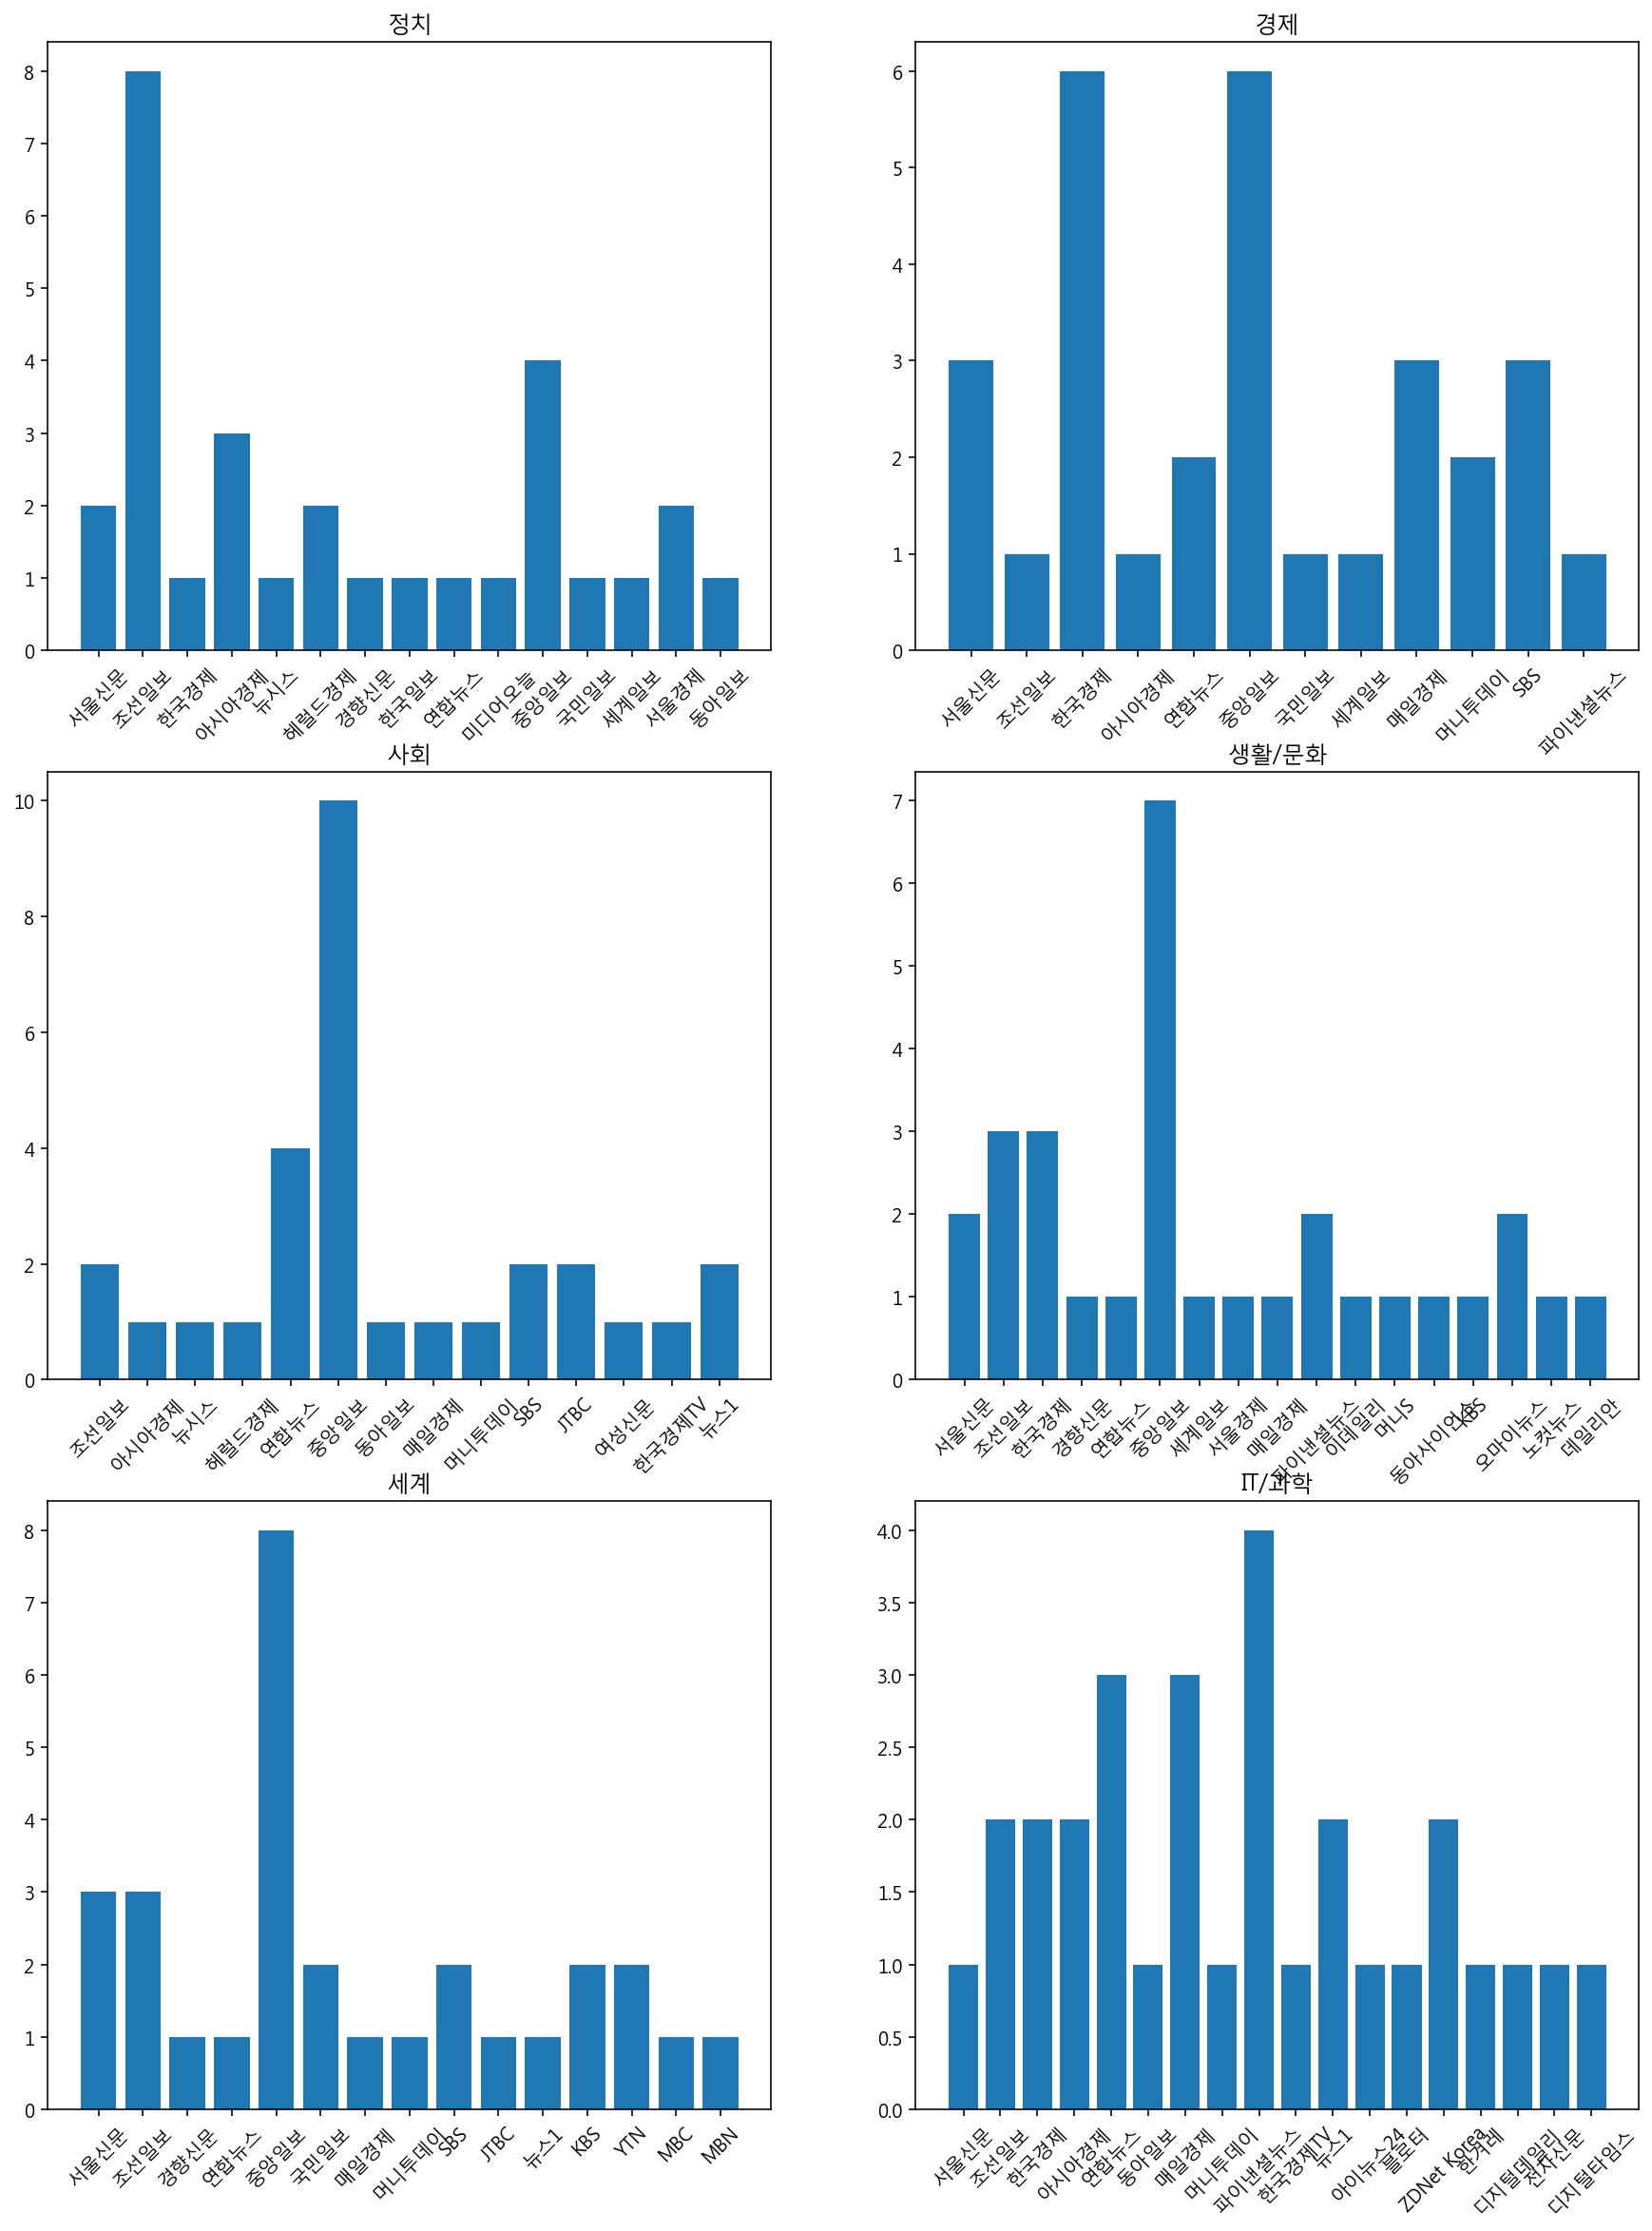

In [49]:
fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(15,20))
axs[0][0].bar(df_of['100'].dropna().index,df_of['100'].dropna(),tick_label=df_of['100'].dropna().index)
axs[0][0].set_title(the_codes2['100'][0])
axs[0][0].set_xticklabels(axs[0][0].get_xticklabels(),rotation=45)

axs[0][1].bar(df_of['101'].dropna().index,df_of['101'].dropna(),tick_label=df_of['101'].dropna().index)
axs[0][1].set_title(the_codes2['101'][0])
axs[0][1].set_xticklabels(axs[0][1].get_xticklabels(),rotation=45)

axs[1][0].bar(df_of['102'].dropna().index,df_of['102'].dropna(),tick_label=df_of['102'].dropna().index)
axs[1][0].set_title(the_codes2['102'][0])
axs[1][0].set_xticklabels(axs[1][0].get_xticklabels(),rotation=45)

axs[1][1].bar(df_of['103'].dropna().index,df_of['103'].dropna(),tick_label=df_of['103'].dropna().index)
axs[1][1].set_title(the_codes2['103'][0])
axs[1][1].set_xticklabels(axs[1][1].get_xticklabels(),rotation=45)

axs[2][0].bar(df_of['104'].dropna().index,df_of['104'].dropna(),tick_label=df_of['104'].dropna().index)
axs[2][0].set_title(the_codes2['104'][0])
axs[2][0].set_xticklabels(axs[2][0].get_xticklabels(),rotation=45)

axs[2][1].bar(df_of['105'].dropna().index,df_of['105'].dropna(),tick_label=df_of['105'].dropna().index)
axs[2][1].set_title(the_codes2['105'][0])
axs[2][1].set_xticklabels(axs[2][1].get_xticklabels(),rotation=45)
plt.show()

In [31]:
ages={}
for x in range(10,70,10):
    ages[str(x)]=[str(x)+'대']

In [32]:
for age in ages:
    params = {'rankingType': 'age',
    'subType': age,
    'date': '20200615'}
    sub_page=requests.get('https://news.naver.com/main/ranking/popularDay.nhn',params=params)
    sub_soup=BeautifulSoup(sub_page.content,"html.parser")
    view_counts=sub_soup.find_all('div',{'class':'ranking_view'})
    if len(view_counts)==0:
        view_counts=sub_soup.find_all('div',{'class':'count_view'})
    cosum=0
    for view_count in view_counts:
        cosum+=int(view_count.get_text().replace(',',''))
    ages[age].append(cosum)

In [33]:
ages

{'10': ['10대', 1371],
 '20': ['20대', 27296],
 '30': ['30대', 58645],
 '40': ['40대', 63509],
 '50': ['50대', 40449],
 '60': ['60대', 20762]}

In [34]:
df2=pd.DataFrame(ages)

In [35]:
df2

,10,20,30,40,50,60
0,10대,20대,30대,40대,50대,60대
1,1371,27296,58645,63509,40449,20762


In [36]:
df2.columns=df2.iloc[0,:]

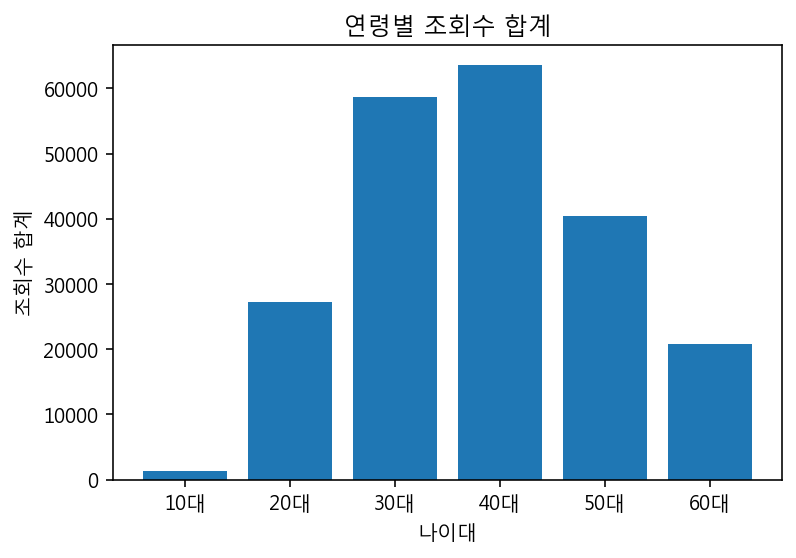

In [37]:
plt.bar(df2.columns,df2.iloc[1,:])
plt.title("연령별 조회수 합계")
plt.xlabel("나이대")
plt.ylabel("조회수 합계")
plt.savefig("ages_counts")

In [38]:
import wordcloud
from wordcloud import WordCloud

In [39]:
import random

In [40]:
ga=['가','나','다','라','마','바','사','아','자','차','카','타','파','하']

In [41]:
nums=[ga[random.randrange(len(ga))]+ga[random.randrange(len(ga))] for x in range(10000)]

In [42]:
nums_joined=' '.join(nums)

In [43]:
wordcloud = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf',background_color='white').generate(nums_joined)

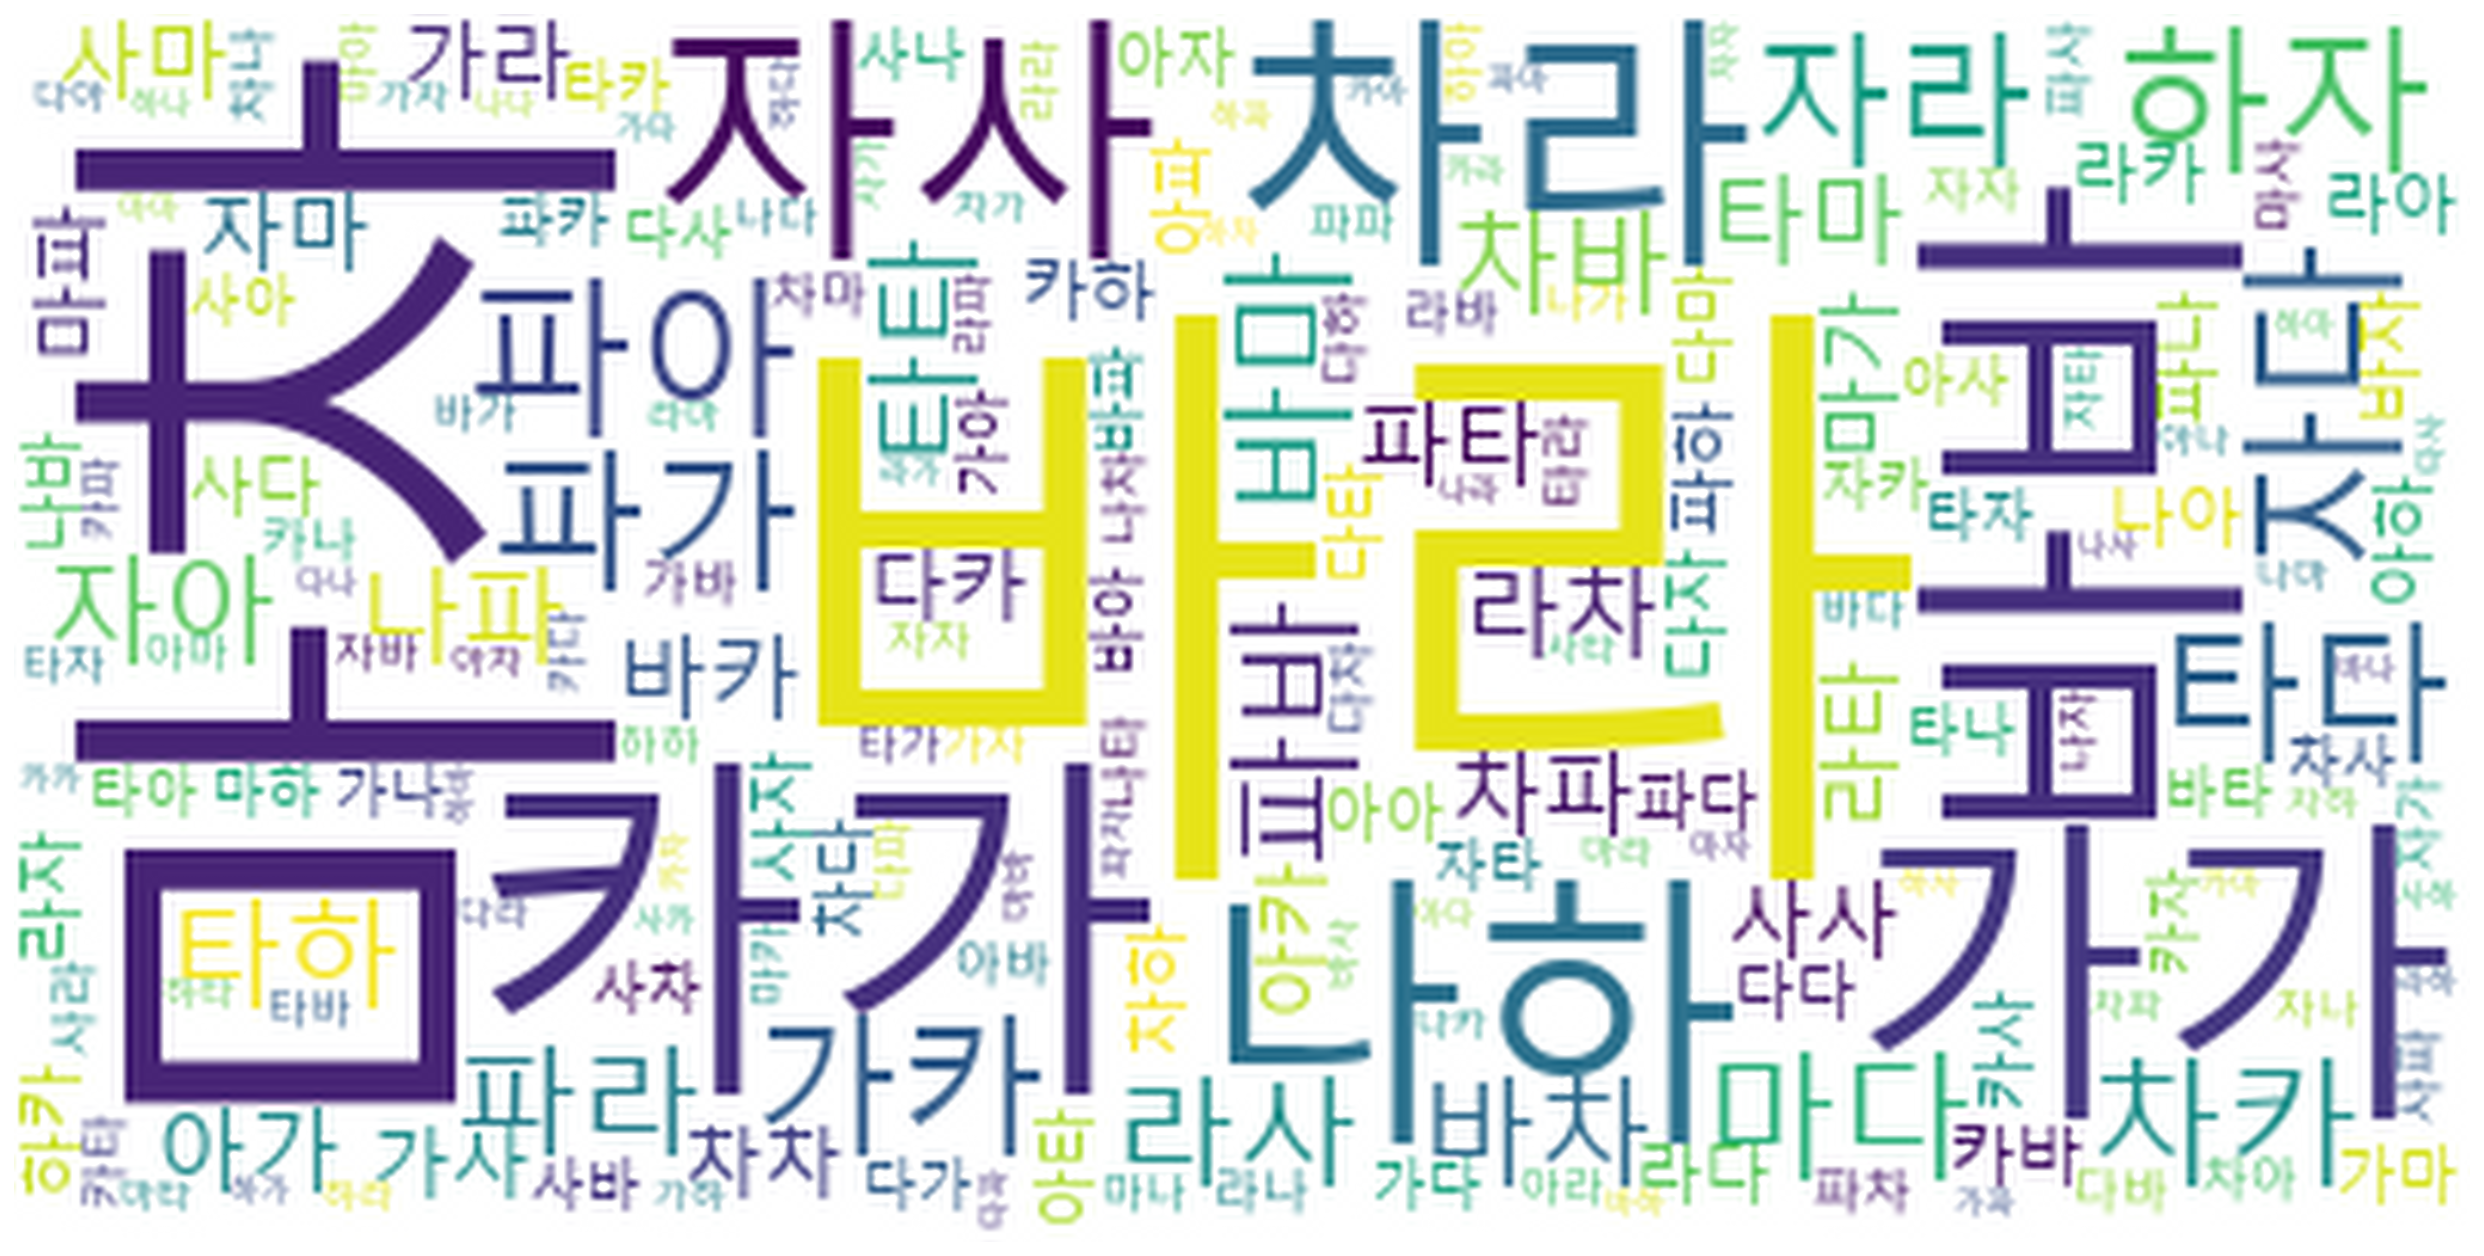

In [44]:
plt.figure(figsize=(22,22)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show()